# EDA the simulation results of slurp
ggplot default setting handles the datetime poorly 
use matplotlib to do EDA

In [2]:
#load packages
import sqlite3
import re
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [26]:
# Build connection with db
con = sqlite3.connect('../03processed-data/apsimxFiles/ModifiedSKL_0.01AshleyDeneSD2.db')
mycur = con.cursor() 
mycur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
(mycur.fetchall())

[('Report',),
 ('SummaryNumbers',),
 ('_Checkpoints',),
 ('_Factors',),
 ('_InitialConditions',),
 ('_Messages',),
 ('_Simulations',),
 ('_Units',)]

In [27]:
report = pd.read_sql('Select * from Report',  con)

In [28]:
report['Date'] = pd.to_datetime(report['Date'])
report.set_index('Date', inplace=True)

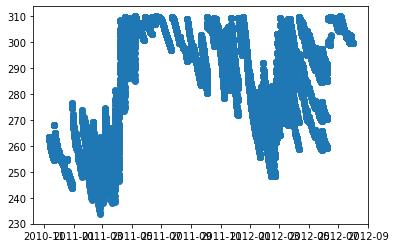

In [65]:
plt.plot(report.index, 'PSWC', marker = 'o', linestyle = "None",data=report)

# Bring in the observed data

In [19]:
con_obs = sqlite3.connect('../03processed-data/Richard.sqlite3')
mycur = con_obs.cursor() 
mycur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")
(mycur.fetchall())

[('ES',),
 ('Phenology',),
 ('SoilWater',),
 ('SowingDates',),
 ('biomass',),
 ('met_AshleyDene',),
 ('met_Iversen12',),
 ('root',)]

In [41]:
obs = pd.read_sql('Select * from SoilWater', con_obs)
obs.set_index('Clock.Today', inplace = True)
obs.index = pd.to_datetime(obs.index)
obs.index.normalize()
obs

,Experiment,Season,SowingDate,Rep,Plot,Seed,DAS,SW(1),SW(2),SW(3),...,SW(15),SW(16),SW(17),SW(18),SW(19),SW(20),SW(21),SW(22),SW(23),SWC
Clock.Today,,,,,,,,,,,,,,,,,,,,,
2010-11-09,AshleyDene,2010/11,SD1,1.0,8.0,CS,19.0,17.4,17.4,17.100000,...,10.700000,11.250000,11.400000,11.800000,10.700000,9.900000,9.550000,10.500000,11.900000,270.933333
2010-11-09,AshleyDene,2010/11,SD1,2.0,32.0,CS,19.0,21.1,21.1,15.400000,...,13.850000,14.450000,13.950000,11.800000,11.900000,12.100000,11.500000,11.150000,11.900000,298.050000
2010-11-09,AshleyDene,2010/11,SD1,3.0,50.0,CS,19.0,17.9,17.9,13.950000,...,9.900000,11.100000,12.050000,11.400000,10.900000,10.800000,11.150000,11.400000,11.550000,248.100000
2010-11-09,AshleyDene,2010/11,SD1,4.0,73.0,CS,19.0,25.2,25.2,20.750000,...,8.000000,8.950000,9.400000,9.600000,10.250000,11.150000,11.850000,12.400000,11.775000,276.075000
2010-11-09,AshleyDene,2010/11,SD2,1.0,17.0,CS,0.0,18.4,18.4,16.800000,...,10.350000,8.950000,8.300000,8.150000,8.950000,9.650000,10.250000,10.550000,11.700000,245.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-05,Iversen12,2011/12,SD10,4.0,100.0,CS,610.0,30.4,30.4,29.403172,...,19.448455,24.806154,30.056163,28.338508,26.609327,28.441071,30.259881,30.931002,31.600362,573.262178
2012-06-21,Iversen12,2011/12,SD10,1.0,97.0,CS,626.0,36.3,36.3,31.478791,...,14.478581,19.830224,25.076388,25.367097,25.657481,28.092190,30.504129,30.015399,29.525735,599.140720
2012-06-21,Iversen12,2011/12,SD10,2.0,98.0,CS,626.0,33.7,33.7,30.422739,...,15.428212,14.953812,14.478581,22.864761,30.991926,29.974630,28.953275,30.137669,31.316606,540.089961


In [42]:
SD2 = obs[(obs['Experiment'] == 'AshleyDene') 
          & (obs['SowingDate']=='SD2')]

In [47]:
SD2 = SD2.groupby('Clock.Today').mean()

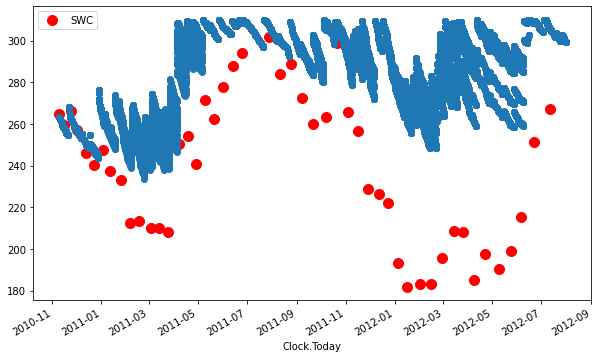

In [66]:
SD2.plot(y = 'SWC',figsize=(10, 6), style='ro-',linestyle='None', ms = 10)
plt.plot(report.index, 'PSWC', marker = 'o', linestyle = "None",data=report)